# Mašinsko Učenje

<h3>Milan Stanković br. ind. 1407</h3>
<h3> Aleksandar Stamenković br. ind. 1403</h3>

Univerzitet u Nišu <br>
Elektronski Fakultet

Studijski program: Računarstvo i Informatika<br>
Modul: Bezbednost Računarskih Sistema<br>
Predmet: Mašinsko Učenje<br>

# Uvod

<h2> AirQuality-AQI</h2>
<h3> Informacije o datasetu: </h3>

<a>Link: https://archive.ics.uci.edu/ml/datasets/air+quality </a>

<p> Skup podataka sadrži 9358 instanci prosečnih odgovora po satu iz niza od 5 hemijskih senzora metalnih oksida ugrađenih u hemijski multisenzorski uređaj za kvalitet vazduha. Uređaj se nalazio na terenu u značajno zagađenom području, u nivou puta, u italijanskom gradu. Podaci su zabeleženi od marta 2004. do februara 2005. (jedna godina) i predstavljaju najduže besplatne dostupne snimke odgovora uređaja hemijskih senzora kvaliteta vazduha koji su raspoređeni na terenu. Ground Truth prosečne koncentracije po satu za CO, nemetanske ugljovodonike, benzol, ukupne azotne okside (NOx) i azot-dioksid (NO2) i obezbeđene su od strane referentnog sertifikovanog analizatora. Dokazi unakrsne osetljivosti, kao i pomaci koncepta i senzora su prisutni kao što je opisano u De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (potrebno je navesti) koji na kraju utiče na mogućnosti procene koncentracije senzora. <br>
Ovaj skup podataka se može koristiti isključivo u istraživačke svrhe. Komercijalne svrhe su potpuno isključene. </p>

<h3> Atributi: </h3>

0. Date (DD/MM/YYYY)
1. Time (HH.MM.SS)
2. True hourly averaged concentration CO in mg/m^3 (reference analyzer)
3. PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
4. True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
5. True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
6. PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
7. True hourly averaged NOx concentration in ppb (reference analyzer)
8. PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
9. True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
10. PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
11. PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
12. Temperature in Â°C
13. Relative Humidity (%)
14. AH Absolute Humidity
15. AQI - Resulting value


# 1. Importovanje biblioteka i dataseta

In [2]:
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import collections
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

     |████████████████████████████████| 292 kB 4.7 MB/s            


In [3]:
df = pd.read_csv("AirQualityUCI.csv")
df.head()

,Date,Time,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,TEMP,RH,AH,AQI
0,10/3/2004,18:00:00,2.6,1360,11.9,1046,1056,113,1692,1268,13.6,48.9,0.7578,730.996917
1,10/3/2004,19:00:00,2.0,1292,9.4,955,1174,92,1559,972,13.3,47.7,0.7255,676.249810
2,10/3/2004,20:00:00,2.2,1402,9.0,939,1140,114,1555,1074,11.9,54.0,0.7502,700.850884
3,10/3/2004,21:00:00,2.2,1376,9.2,948,1092,122,1584,1203,11.0,60.0,0.7867,722.114573
4,10/3/2004,22:00:00,1.6,1272,6.5,836,1205,116,1490,1110,11.2,59.6,0.7888,697.492551


# 2. Predprocesiranje

In [4]:
df.shape

(6941, 14)

## 2.1. Tipovi podataka

In [5]:
df.dtypes

Date             object
Time             object
CO_GT           float64
PT08_S1_CO        int64
C6H6_GT         float64
PT08_S2_NMHC      int64
PT08_S3_NOx       int64
NO2_GT            int64
PT08_S4_NO2       int64
PT08_S5_O3        int64
TEMP            float64
RH              float64
AH              float64
AQI             float64
dtype: object

## 2.2 Provera nedostajućih vrednosti

In [6]:
df.isnull().any()

Date            False
Time            False
CO_GT           False
PT08_S1_CO      False
C6H6_GT         False
PT08_S2_NMHC    False
PT08_S3_NOx     False
NO2_GT          False
PT08_S4_NO2     False
PT08_S5_O3      False
TEMP            False
RH              False
AH              False
AQI             False
dtype: bool

## 2.3. Provera duplikata

In [7]:
duplicates = df.duplicated().sum()
duplicates

0

# 3. Statistika podataka
## 3.1 Opis dataseta

In [8]:
df.describe()

,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,TEMP,RH,AH,AQI
count,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000
mean,2.182467,1119.913269,10.554488,958.543005,816.893387,113.874082,1452.648898,1057.756519,17.755323,48.881905,0.985573,813.566205
std,1.441158,218.733754,7.465226,264.055002,251.897200,47.475017,353.301576,406.509957,8.844909,17.433193,0.401097,359.049338
min,0.100000,647.000000,0.200000,390.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,134.659525
25%,1.100000,956.000000,4.900000,760.000000,642.000000,79.000000,1207.000000,760.000000,11.200000,35.300000,0.694100,549.516076
50%,1.900000,1085.000000,8.800000,931.000000,786.000000,110.000000,1457.000000,1006.000000,16.800000,49.200000,0.953900,785.754256
75%,2.900000,1254.000000,14.600000,1135.000000,947.000000,142.000000,1683.000000,1322.000000,23.700000,62.200000,1.251600,1042.934024
max,11.900000,2040.000000,63.700000,2214.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.180600,2541.143705


Maksimalna vrednosta parametra **AQI** je **2541.14**, dok je minimalna vrednost **134.65**. Maksimalna **temperatura** je **44.6°C** dok je minimalna zabeležena **temeratura** **-1.9°C**, prosečna **temperatura** je **8.84°C**

## 3.2. Pregled podataka, rasipanje i klasterizacija

Izlazni parametar (atribut) **AQI** predstavljamo u zavisnosti od apsolutne vlažnosti vazduha **AH**.

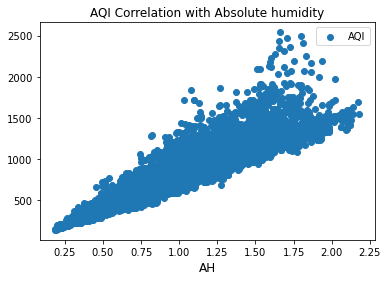

In [9]:
plt.scatter(df.AH, df.AQI, label='AQI')

plt.title('AQI Correlation with Absolute humidity')
plt.xlabel('AH', fontsize=12)
plt.legend()
plt.show()

Sa slike se vidi skoro linearna zavisnos između indeksa kvaliteta vazduha **AQI** i apsolutne vlažnosti vazduha **AH**.

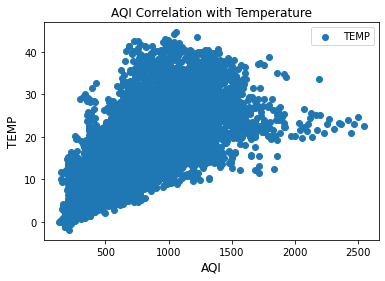

In [10]:
plt.scatter(df.AQI, df.TEMP, label='TEMP')

plt.title('AQI Correlation with Temperature')
plt.xlabel('AQI', fontsize=12)
plt.ylabel('TEMP', fontsize=12)
plt.legend()
plt.show()

### Broj jedinstvenih vrednosti po atributima:

In [11]:
for c in df.columns:
    print("Number of unique values in {}: {}".format(c, len(df[c].unique())))

Number of unique values in Date: 341
Number of unique values in Time: 24
Number of unique values in CO_GT: 94
Number of unique values in PT08_S1_CO: 1016
Number of unique values in C6H6_GT: 392
Number of unique values in PT08_S2_NMHC: 1189
Number of unique values in PT08_S3_NOx: 1129
Number of unique values in NO2_GT: 274
Number of unique values in PT08_S4_NO2: 1543
Number of unique values in PT08_S5_O3: 1693
Number of unique values in TEMP: 428
Number of unique values in RH: 742
Number of unique values in AH: 5460
Number of unique values in AQI: 6941


Prikazacemo zavisnosti izmedju svakih od parametara pomocu seaborn i hue, gde ce nam na x-osi biti parametar koji poredimo, dok su na y-osi i hue biti **AQI** i **TEMP** (temperatura), respektivno.

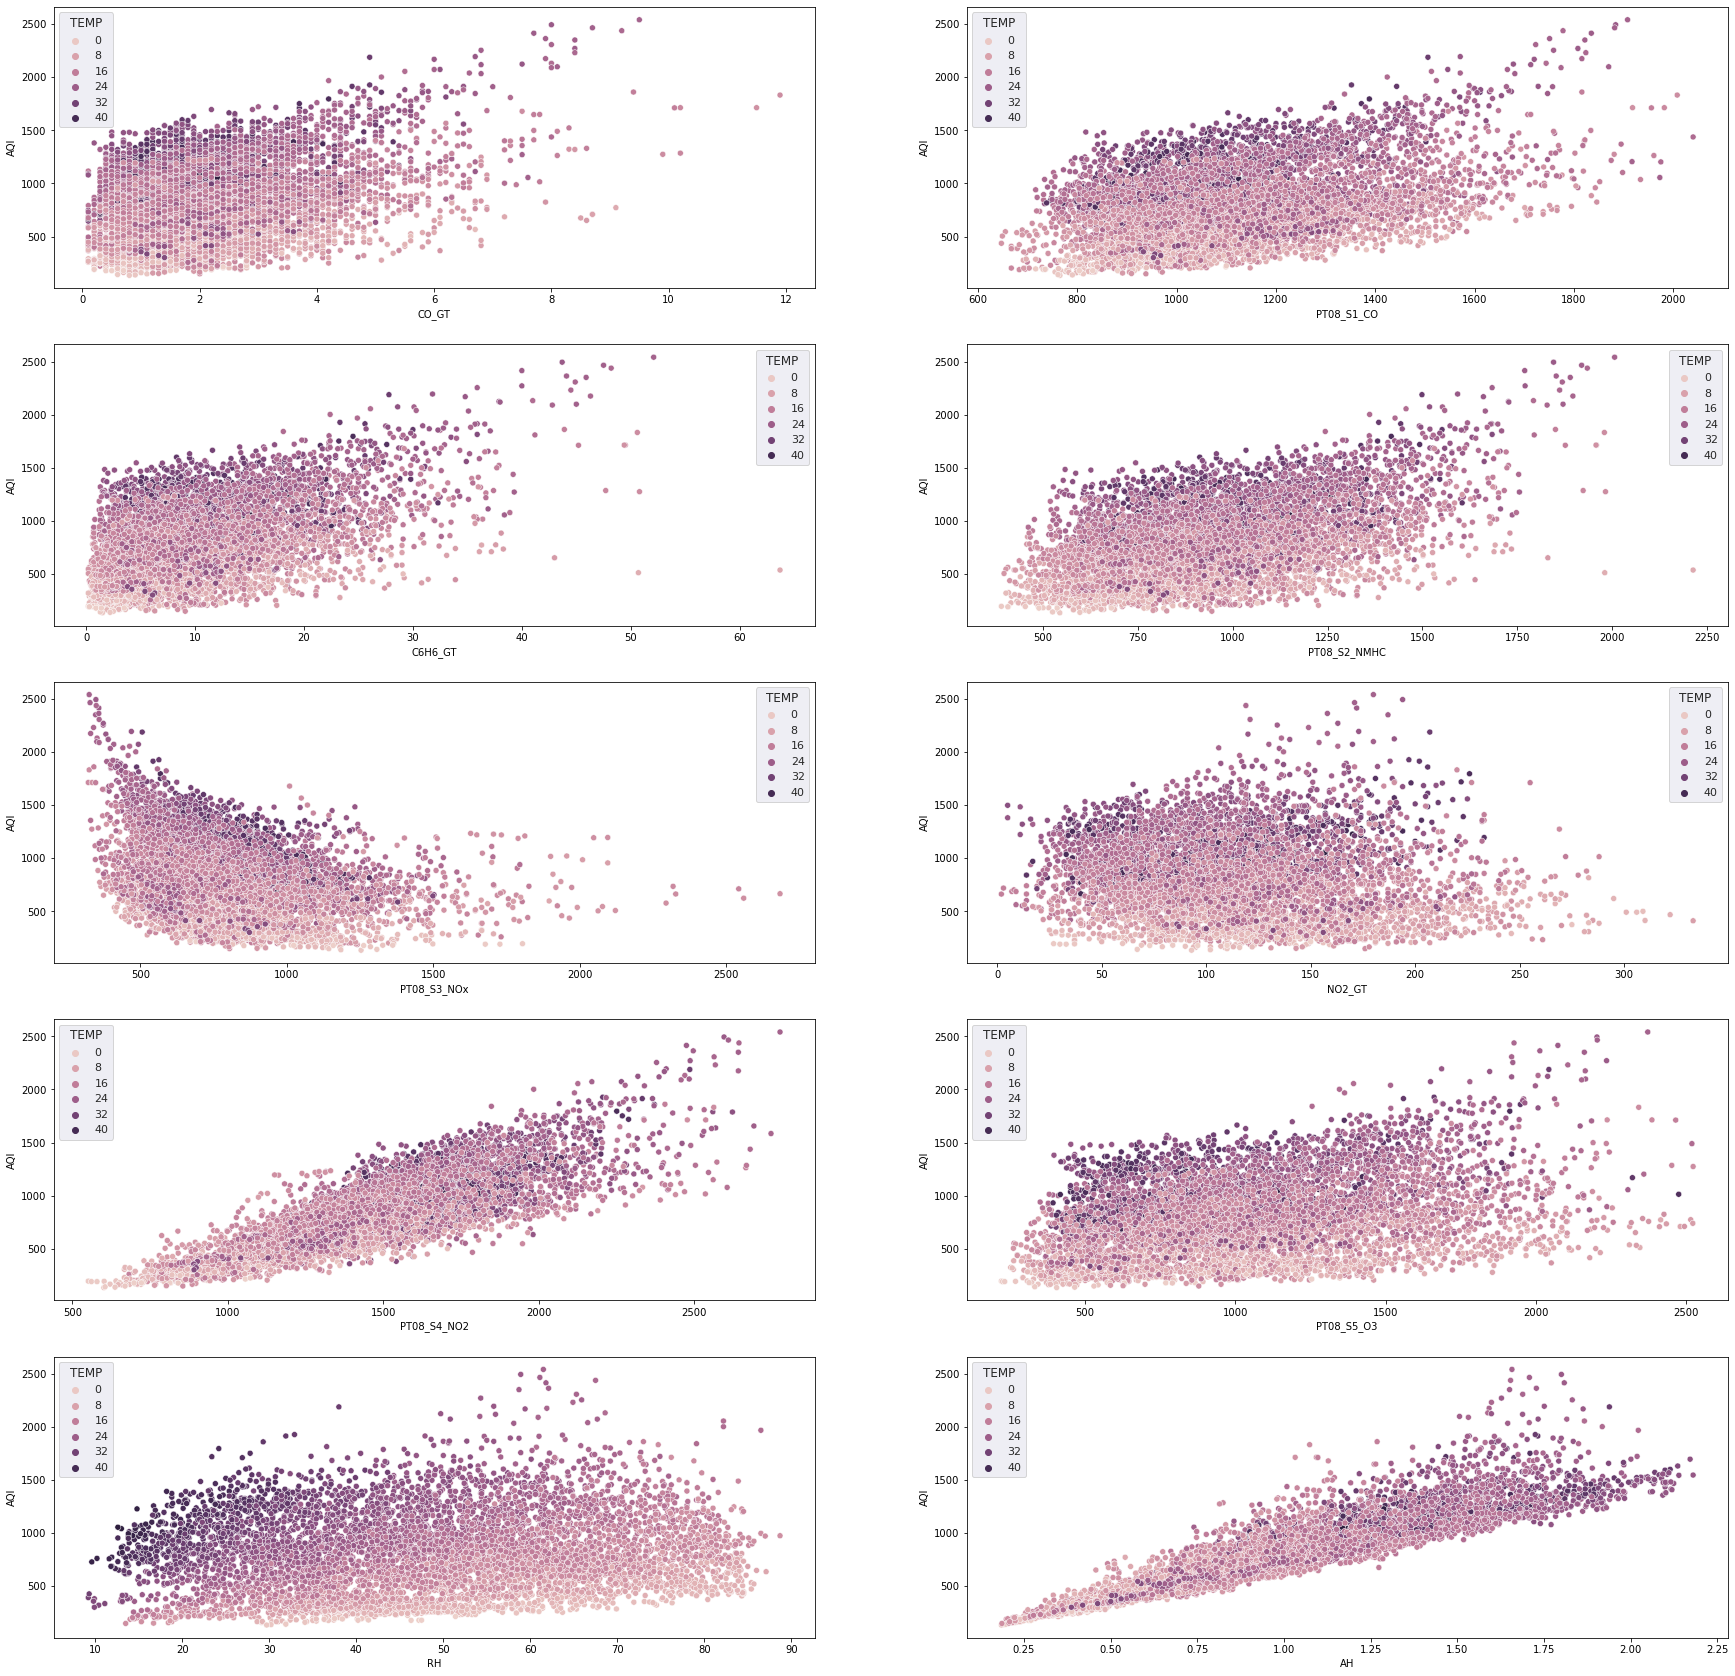

In [12]:
fig, ax = plt.subplots(5, 2, figsize=(30, 30))
sns.set_theme(style='darkgrid')
sns.scatterplot(ax=ax[0][0], x=df.CO_GT, y=df.AQI, hue=df.TEMP, data=df)
sns.scatterplot(ax=ax[0][1], x=df.PT08_S1_CO, y=df.AQI, hue=df.TEMP, data=df)
sns.scatterplot(ax=ax[1][0], x=df.C6H6_GT, y=df.AQI, hue=df.TEMP, data=df)
sns.scatterplot(ax=ax[1][1], x=df.PT08_S2_NMHC, y=df.AQI, hue=df.TEMP, data=df)
sns.scatterplot(ax=ax[2][0], x=df.PT08_S3_NOx, y=df.AQI, hue=df.TEMP, data=df)
sns.scatterplot(ax=ax[2][1], x=df.NO2_GT, y=df.AQI, hue=df.TEMP, data=df)
sns.scatterplot(ax=ax[3][0], x=df.PT08_S4_NO2, y=df.AQI, hue=df.TEMP, data=df)
sns.scatterplot(ax=ax[3][1], x=df.PT08_S5_O3, y=df.AQI, hue=df.TEMP, data=df)
sns.scatterplot(ax=ax[4][0], x=df.RH, y=df.AQI, hue=df.TEMP, data=df)
sns.scatterplot(ax=ax[4][1], x=df.AH, y=df.AQI, hue=df.TEMP, data=df)

plt.show()

Sa slike se mogu uočiti da postoje klasteri koji su grupisani po hue, odnosno temperaturi.

Na **slici 5** se može primetiti da se sa smanjenjem zagađenosti povećava opseg parametra **NOx**, ali da se sa smanjenjem temperature smanjuje i zagađenost.<br>
Na **slici 7** se uočava skoro linearna zavisnost između parametra **PT08_S4_NO2** i **AQI**, kao i prisustvo niske temperature kada je smanjena koncentracija **PT08_S4_NO2** i kada je smanjena zagađenost.<br>
Na **slici 10** se uočava takođe skoro linearna zavisnost između vlažnosti vazduha i zagađenosti. Takođe, može se primetiti da sa povećanjem vlažnosti vazduha i zagađenosti je povećana i temperatura.

Na svim slikama se uočava slična zavisnost između temperature i zagađenosti, odnosno da se sa povećanjem temperature povećava zagađenost. 

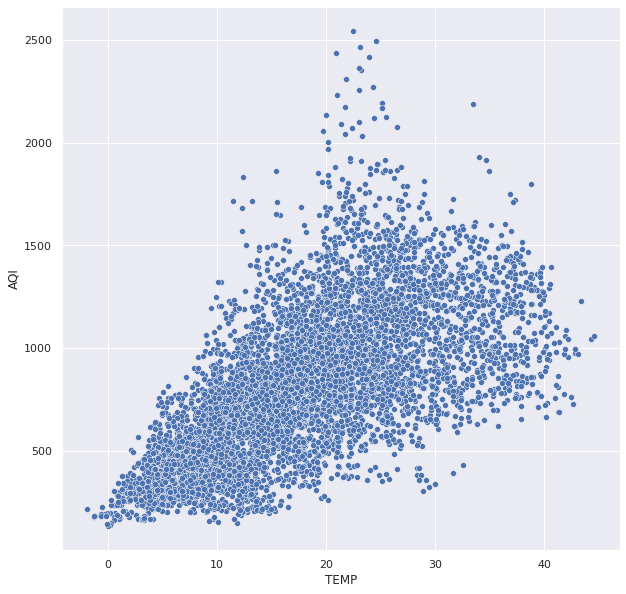

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.set_theme(style='darkgrid')

plt.show()

Na osnovu gornje slike može se uočiti da AQI direktno zavisi od temperate i ta zavisnost je skoro linearna. Tj. povećanjem temperature, povećava se i zagađenost vazduha.

## 4. Modeli

### 4.1 Razdvajanje skupa podataka

Formiraćemo dva podskupa podataka gde će jedan skup biti namenjen za **treniranje** (80% podataka), a ostatak će biti namenjen za **testiranje** (20% podataka).

In [13]:
X = df[['CO_GT', 
        'PT08_S1_CO', 
        'C6H6_GT', 
        'PT08_S2_NMHC', 
        'PT08_S3_NOx', 
        'NO2_GT', 
        'PT08_S4_NO2', 
        'PT08_S5_O3',
        'TEMP',
        'RH',
        'AH']]
Y = df[['AQI']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3) 
# random_state controls the shuffling applied to the data before applying the split

In [14]:
print("Whole dataset X: {}".format(X.shape))
print("Whole dataset Y: {}".format(Y.shape))
print("X dataset for training X_train: {}".format(X_train.shape))
print("X dataset for training X_test: {}".format(X_test.shape))
print("Y dataset for training Y_train: {}".format(Y_train.shape))
print("Y dataset for training Y_test: {}".format(Y_test.shape))

Whole dataset X: (6941, 11)
Whole dataset Y: (6941, 1)
X dataset for training X_train: (5552, 11)
X dataset for training X_test: (1389, 11)
Y dataset for training Y_train: (5552, 1)
Y dataset for training Y_test: (1389, 1)


## 4.2 Evaluacija modela

### R2_score

R-kvadrat je mera dobrog uklapanja za modele linearne regresije. Ova statistika ukazuje na procenat varijanse u zavisnoj promenljivoj koju nezavisne varijable objašnjavaju zajedno. R-kvadrat meri jačinu veze između vašeg modela i zavisne varijable na pogodnoj skali od 0 do 100%. Odnosno statistička mera koliko model regresije aproksimira dati skup podataka.

### RMSE (Root Mean Square Error)

Srednja kvadratna greška ili srednje kvadratna devijacija je jedna od najčešće korišćenih mera za procenu kvaliteta predviđanja. ... RMSE se obično koristi u aplikacijama za učenje pod nadzorom, jer RMSE koristi i treba istinita merenja u svakoj predviđenoj tački podataka.

### K-fold Cross-Validation

K-fold Cross-Validation je statistička metoda koja se koristi za procenu veštine modela mašinskog učenja.

Obično se koristi u primenjenom mašinskom učenju za upoređivanje i odabir modela za dati problem prediktivnog modeliranja jer je lak za razumevanje, lak za implementaciju i rezultira procenama veština koje generalno imaju manju pristrasnost od drugih metoda.

### MAE

Srednja apsolutna greška (MAE) je mera grešaka između uparenih opservacija koje izražavaju isti fenomen. Primeri y naspram x uključuju poređenja predviđenog i posmatranog, naknadnog vremena u odnosu na početno vreme, i jednu tehniku merenja u odnosu na alternativnu tehniku merenja.

In [15]:
model_perfs = {}
def RepeatedKFoldPerf(m, x, y):
    result = ""
    
    # Repeated k-Fold Cross=Validation MAE
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(m, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    scores = absolute(scores)
    result += 'MAE: %.3f (%.3f)' % (mean(scores), std(scores))
    
    return result

## 4.3 Linearna regresija

In [16]:
lin_model = LinearRegression()

print("RKFold performance {}".format(RepeatedKFoldPerf(lin_model, X, Y)))

lin_model.fit(X_train, Y_train)
print("R2 score: {}".format(lin_model.score(X_test, Y_test)))
model_perfs['linear'] = lin_model.score(X_test, Y_test)

RKFold performance MAE: 31.142 (1.241)
R2 score: 0.9824514007063291


## 4.4 Polinomna regresija

In [17]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
poly_model = LinearRegression()

print("RKFold performance: {}".format(RepeatedKFoldPerf(poly_model, X_poly, Y)))

poly_model.fit(X_train, Y_train)
print("R2 score: {}".format(poly_model.score(X_test, Y_test)))
model_perfs['polynomial'] = poly_model.score(X_test, Y_test)

RKFold performance: MAE: 0.000 (0.000)
R2 score: 0.9824514007063291


## 4.5 Lasso regresija

In [18]:
lasso_model = Lasso(alpha=0.01)

print("RKFold performance: {}".format(RepeatedKFoldPerf(lasso_model, X, Y)))

lasso_model.fit(X_train, Y_train)
print("R2 score: {}".format(lasso_model.score(X_test, Y_test)))
model_perfs['lasso'] = lasso_model.score(X_test, Y_test)

RKFold performance: MAE: 31.138 (1.241)
R2 score: 0.9824500591406389


## 4.6 Regresija stablom odluke

In [19]:
tree_model = DecisionTreeRegressor()

print("RKFold performance: {}".format(RepeatedKFoldPerf(tree_model, X, Y)))

tree_model.fit(X_train, Y_train)
print("R2 score: {}".format(tree_model.score(X_test, Y_test)))
model_perfs['decision_tree'] = tree_model.score(X_test, Y_test)

RKFold performance: MAE: 32.345 (0.911)
R2 score: 0.9810868860899579


## 4.7 Random forest regresija

In [20]:
#rf_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf_model = RandomForestRegressor()

print("RKFold performance: {}".format(RepeatedKFoldPerf(rf_model, X, Y.values.ravel())))

rf_model.fit(X_train, Y_train.values.ravel())
print("R2 score: {}".format(rf_model.score(X_test, Y_test)))
model_perfs['random_forest'] = rf_model.score(X_test, Y_test)

RKFold performance: MAE: 19.778 (0.992)
R2 score: 0.9926752203557867


## 4.8 Support vector regresija

In [21]:
svr_model = SVR(kernel = 'rbf')

print("RKFold performance: {}".format(RepeatedKFoldPerf(svr_model, X, Y.values.ravel())))

svr_model.fit(X_train, Y_train.values.ravel())
print("R2 score: {}".format(svr_model.score(X_test, Y_test)))
model_perfs['support_vector'] = svr_model.score(X_test, Y_test)

RKFold performance: MAE: 198.219 (6.207)
R2 score: 0.4720996160502976


## 4.9 Bayes Ridge regresija

In [22]:
bayes_ridge_model = BayesianRidge()

print("RKFold performance: {}".format(RepeatedKFoldPerf(bayes_ridge_model, X, Y.values.ravel())))

bayes_ridge_model.fit(X_train, Y_train.values.ravel())
print("R2 score: {}".format(bayes_ridge_model.score(X_test, Y_test)))
model_perfs['bayes_ridge'] = bayes_ridge_model.score(X_test, Y_test)

RKFold performance: MAE: 31.140 (1.241)
R2 score: 0.9824511859876409


## 4.10 Ridge regresija

In [23]:
ridge_model = Ridge(alpha=1.0)

print("RKFold performance: {}".format(RepeatedKFoldPerf(ridge_model, X, Y.values.ravel())))

ridge_model.fit(X_train, Y_train.values.ravel())
print("R2 score: {}".format(ridge_model.score(X_test, Y_test)))
model_perfs['ridge'] = ridge_model.score(X_test, Y_test)

RKFold performance: MAE: 31.095 (1.246)
R2 score: 0.9824358302958462


## 4.11 ElasticNet regresija

In [24]:
elastic_model = ElasticNet(alpha=0.01, l1_ratio=1.0)

print("RKFold performance: {}".format(RepeatedKFoldPerf(elastic_model, X, Y.values.ravel())))

elastic_model.fit(X_train, Y_train.values.ravel())
print("R2 score: {}".format(elastic_model.score(X_test, Y_test)))
model_perfs['elastic_net'] = elastic_model.score(X_test, Y_test)

RKFold performance: MAE: 31.138 (1.241)
R2 score: 0.9824500591406389


## 4.12 Poređenje rezultata

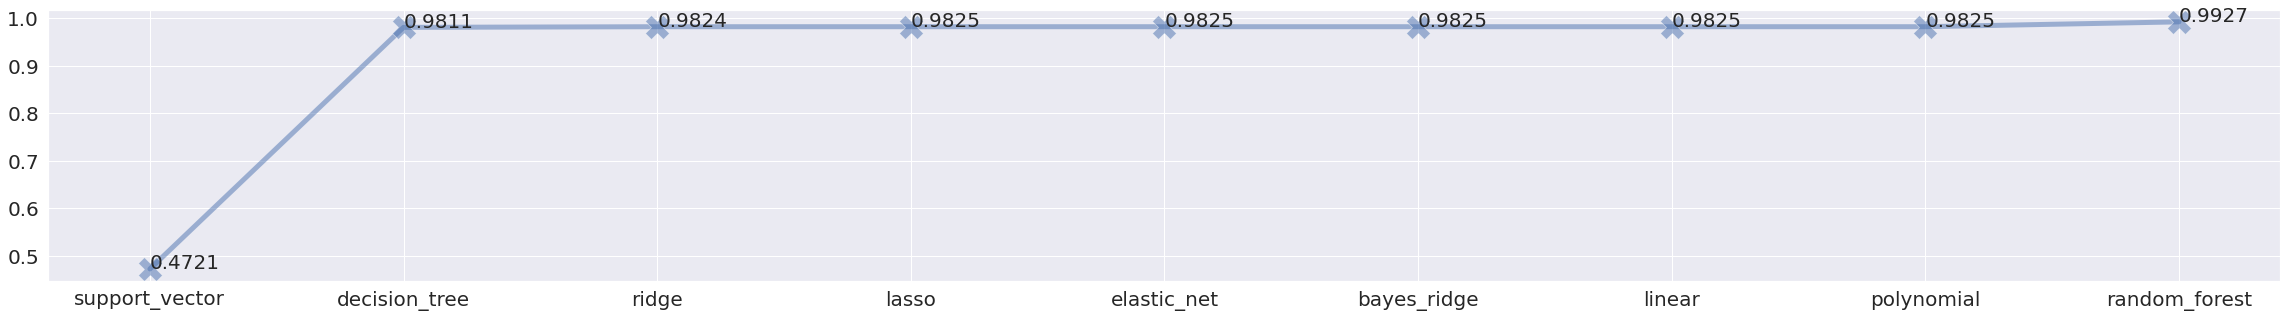

In [25]:
sorted_dict = sorted(model_perfs.items(), key=lambda kv: kv[1])
sorted_dict = collections.OrderedDict(sorted_dict)

fig_dims = (40, 5)
fig, ax = plt.subplots(figsize=fig_dims)

ax.tick_params(labelsize=20)

for key, value in sorted_dict.items():
    ax.text(key, value, value.round(4), size=20)

sns.lineplot(
    data=sorted_dict,
    dashes=False,
    palette="Set1",
    marker="X",
    markersize=24,
    alpha=0.5,
    ax=ax,
    linewidth = 5
)

plt.show()

# 5. Izdvajanje parametara
## 5.1 Korelacija podataka
Radi pregleda korelacije između atributa dataset-a, iskoristićemo korelacionu matricu, tako da ćemo prikazati u njoj sve atribute. Opseg vrednosti koje uzimaju se kreću od -1 do 1.
<ul>
    <li><strong>-1</strong> jaka negativna korelacija</li>
    <li><strong>0</strong> nema korelacije</li>
    <li><strong>1</strong> jaka pozitivna korelacija</li>
</ul>

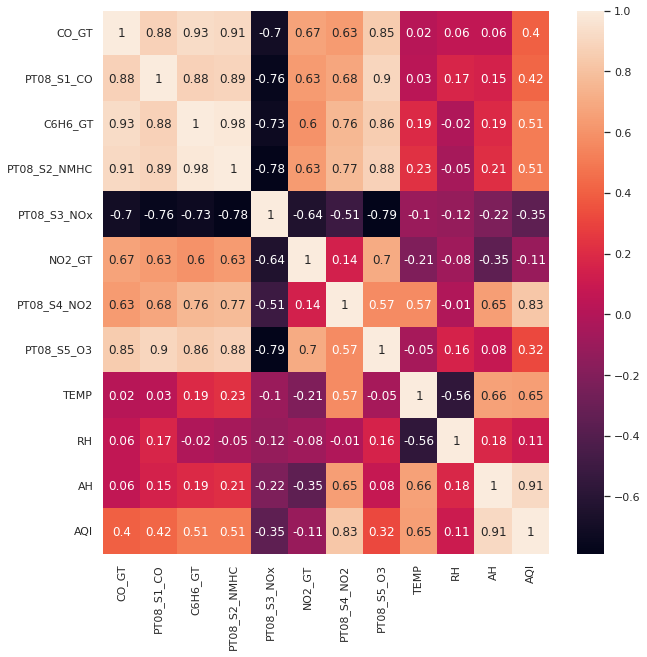

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

Na osnovu **korelacione matrice** sa gornje slike mogu se izvesti neki zaključci:
<ul>
    <li><b>AQI</b> ima slabo izraženu korelaciju sa vrednostima za <b>RH</b> (0.11) i <b>NO2_GT</b> (-0.11).</li>
    <li><b>AQI</b> ima jako izraženu pozitivnu korelaciju sa vrednostima za <b>PT08_S4_NO2</b> (0.83) i <b>AH</b> (0.91).</li>
    <li><b>AQI</b> ima negativnu korelaciju sa vrednosti za <b>PT08_S3_NOx</b> (-0.35).</li>
    <li>Takođe, primećuje se izražena negativna korelacija atributa <b>PT08_S3_NOx</b> sa ostalim atributima.</li>
    <li>Primećuje se i slaba korelacija između relativne vlažnosti (<b>RH</b>) i ostalih atributa (osim <b>temperature</b>, gde je izražena negativna korelacija).</li>
</ul>

# Podešavanje hiperparametara
## 6.1 Podrazumevani hiperparametri
S odzirom na to da se Random Forest algoritam pokazao kao najbolji pri gore izvedenim eksperimentima, izabraćemo njega i u nastavku ćemo raditi s njim.
Najpre ćemo videti dostupne hiperparametre.

In [27]:
rf_model = RandomForestRegressor()
print('Parameters currently in use:\n')
pprint(rf_model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


## 6.2 Grid nasumičnih hiperparametara
Kreiranje grida za evaluaciju.

In [28]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


## 6.3 Random Search trening

In [30]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 15, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train.values.ravel())

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   5.7s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   5.7s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   5.9s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=6

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [31]:
pprint(rf_random.best_params_)

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 2000}


## 6.4 Random Search evaluacija

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, Y_train.values.ravel())
base_accuracy = evaluate(base_model, X_test, Y_test.values.ravel())

In [33]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, Y_test.values.ravel())

Model Performance
Average Error: 20.1926 degrees.
Accuracy = 97.50%.


In [34]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.29%.


## 6.5 Grid Search

In [35]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [90, 100],
    'max_features': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2],
    'n_estimators': [700, 800, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

## 6.6 Grid Search treniranje

In [36]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train.values.ravel())
grid_search.best_params_

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   6.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   6.4s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   6.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   6.8s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   6.7s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   7.4s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   9.0s
[CV] E

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 700}

In [37]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, Y_test.values.ravel())

Model Performance
Average Error: 20.0722 degrees.
Accuracy = 97.44%.


In [38]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.23%.


# 7. Zaključak
U radu su prikazani različiti algoritmi mašinskog učenja. Primenjeni su konkretno algoritmi regresije nad učitanim datasetom koji se odnosi na kvalitet vazduha. Preciznost svih algoritama je dosta slična oko 98-99% dok je jedino Support Vector regresija dala lošiji rezultat od oko 47%.